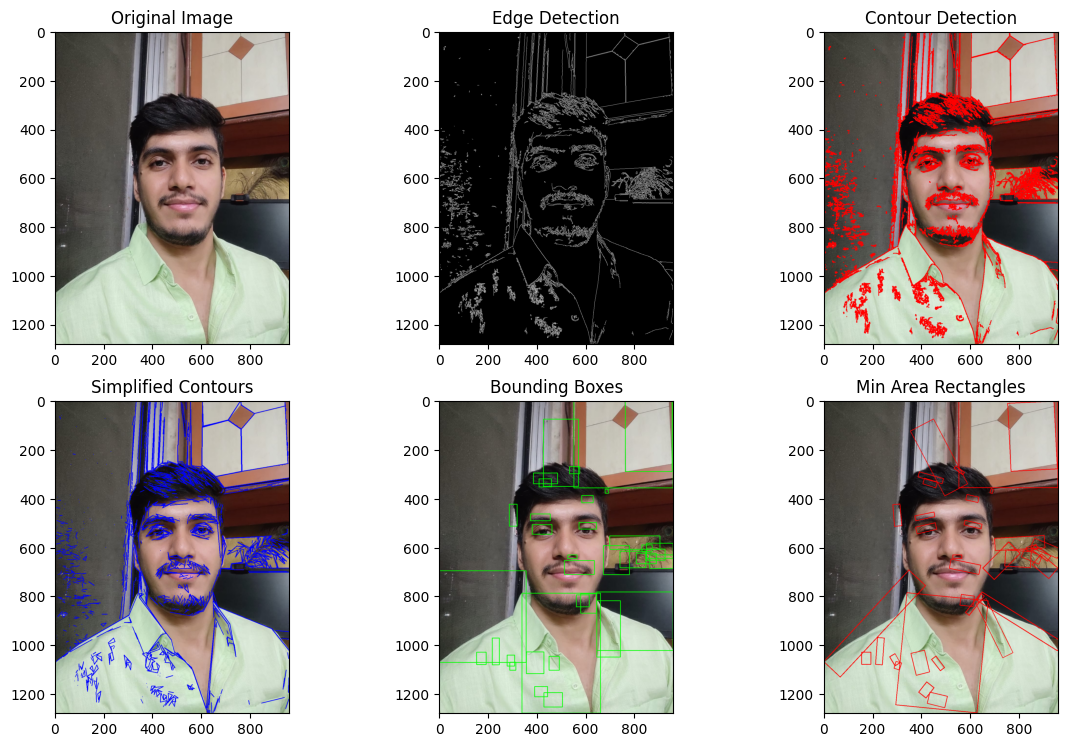

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
path = 'image.jpg'
image = cv2.imread(path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing contours
contour_image = image.copy()

# Iterate over the contours and draw them in blue
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)

# Define a function to simplify contours using Douglas-Peucker
def simplify_contour(contour, epsilon):
    return cv2.approxPolyDP(contour, epsilon, True)

# Create a copy of the original image for drawing simplified contours
simplified_contour_image = image.copy()

# Define the Douglas-Peucker epsilon value (adjust as needed)
epsilon = 10

# Iterate over the contours and simplify them
simplified_contours = [simplify_contour(contour, epsilon) for contour in contours]

# Draw the simplified contours in red
cv2.drawContours(simplified_contour_image, simplified_contours, -1, (255, 0, 0), 2)

# Display all outputs in one window using matplotlib
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")

# Contour Detection
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection")

# Simplified Contours
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(simplified_contour_image, cv2.COLOR_BGR2RGB))
plt.title("Simplified Contours")

# Reload the original image
image = cv2.imread('image.jpg')

# Find and draw bounding boxes
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plot the image with bounding boxes
image_bb = image.copy()
for contour in contours:
    if cv2.contourArea(contour) >= 100:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_bb, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(image_bb, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes')

# Plot the image with minimum area rectangles
image_mar = image.copy()
for contour in contours:
    if cv2.contourArea(contour) >= 100:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(image_mar, [box], 0, (0, 0, 255), 2)

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(image_mar, cv2.COLOR_BGR2RGB))
plt.title('Min Area Rectangles')

# Remove axis labels
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
